In [458]:
import pandas as pd
import numpy as np
from datetime import date
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore') 

>## EDA INVIERNO

In [459]:
df = pd.read_csv("./datos/bikes_eda_proyecto.csv", index_col=0)
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,winter,0,1,1,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,winter,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,winter,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,winter,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,winter,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,winter,1,12,0,6,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,2019-12-28,winter,1,12,0,7,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,2019-12-29,winter,1,12,0,1,1,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,2019-12-30,winter,1,12,0,2,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [460]:
df_resp=df['cnt'].reset_index()


In [461]:
df=df.drop('cnt',axis=1)

In [462]:
df= df[df['season']=='winter']

df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,2018-01-01,winter,0,1,1,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654
1,2,2018-01-02,winter,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670
2,3,2018-01-03,winter,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229
3,4,2018-01-04,winter,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454
4,5,2018-01-05,winter,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,winter,1,12,0,6,1,2,10.420847,11.33210,65.2917,23.458911,247,1867
726,727,2019-12-28,winter,1,12,0,7,1,2,10.386653,12.75230,59.0000,10.416557,644,2451
727,728,2019-12-29,winter,1,12,0,1,1,2,10.386653,12.12000,75.2917,8.333661,159,1182
728,729,2019-12-30,winter,1,12,0,2,1,1,10.489153,11.58500,48.3333,23.500518,364,1432


> EXPLICACIÓN DE LAS VARIABLES

- *instant*: índice.
  
- *dteday*: fecha datetime.
  
- *season*: estación del año(invierno).
  
- *yr*: año -> 0=2018, 1=2019.
  
- *mnth*: mes.
  
- *holiday*: vacaciones -> 1=vacaciones, 0=día de trabajo.
  
- *weekday*: día de la semana.
  
- *workingday*: día de trabajo -> 1=día de trabajo, 0=vacaciones.
  
- *weathersit*: clima de ese día(intensidad del 1 al 4, teniendo en cuenta las precipitaciones. El 1 es pocas nubes y el 4 es tormenta considerable).
  
- *temp*: temperatura del día.
  
- *atemp*: sensación térmica.
  
- *hum*: humedad.
  
- *windspeed*: velocidad del viento.
  
- *casual*: clientes esporádicos del servicio.
  
- *registered*: clientes ya registrados en el servicio (tarifa plana).
  
- *cnt*: número de bicicletas usadas ese día.

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     180 non-null    int64  
 1   dteday      180 non-null    object 
 2   season      180 non-null    object 
 3   yr          180 non-null    int64  
 4   mnth        180 non-null    int64  
 5   holiday     180 non-null    int64  
 6   weekday     180 non-null    int64  
 7   workingday  180 non-null    int64  
 8   weathersit  180 non-null    int64  
 9   temp        180 non-null    float64
 10  atemp       180 non-null    float64
 11  hum         180 non-null    float64
 12  windspeed   180 non-null    float64
 13  casual      180 non-null    int64  
 14  registered  180 non-null    int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 22.5+ KB


In [464]:
# Todas mis columnas son de tipo numérico, pero hago algunos cambios ya que tngo columnas que deben ser categorías.

df['dteday']=df['dteday'].astype('datetime64')

In [465]:
df.describe(include=np.number).T #Solamente tengo season como categorica, que la modificaré más adelante

,count,mean,std,min,25%,50%,75%,max
instant,180.0,261.611111,212.131544,1.000000,45.750000,365.500000,410.250000,730.000000
yr,180.0,0.500000,0.501395,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,180.0,3.100000,3.412268,1.000000,1.000000,2.000000,3.000000,12.000000
holiday,180.0,0.044444,0.206655,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,180.0,3.950000,2.025742,1.000000,2.000000,4.000000,6.000000,7.000000
workingday,180.0,0.955556,0.206655,0.000000,1.000000,1.000000,1.000000,1.000000
weathersit,180.0,1.405556,0.535836,1.000000,1.000000,1.000000,2.000000,3.000000
temp,180.0,12.197035,4.221457,2.424346,9.114700,11.706525,14.849124,23.472500
atemp,180.0,14.831376,4.961332,3.953480,11.608738,14.125325,17.985650,27.430850
hum,180.0,58.167024,15.139273,0.000000,48.322900,54.375000,69.339675,94.826100


In [466]:
df.isnull().sum()  #No hay nulos en ninguna columna

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
dtype: int64

> OUTLIERS

In [467]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 

    for col in lista_columnas:
        Q1 = np.percentile(dataframe[col], 25)
        Q3 = np.percentile(dataframe[col], 75)
        
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0:
            dicc_indices[col] = (list(outliers_data.index))
        
    return dicc_indices 

In [468]:
numericas=df.select_dtypes(include='number')
numericas=list(numericas.columns)

In [469]:
ind=detectar_outliers(numericas, df)

In [470]:
outliers=list(ind.values())
outliers

[[354,
  355,
  356,
  357,
  358,
  359,
  360,
  361,
  362,
  363,
  364,
  719,
  720,
  721,
  722,
  723,
  724,
  725,
  726,
  727,
  728,
  729],
 [0, 14, 49, 358, 365, 385, 413, 723],
 [0, 14, 49, 358, 365, 385, 413, 723],
 [437],
 [68],
 [44, 49, 382, 407, 420, 431, 432, 720],
 [71, 77, 78, 371, 413, 426, 433, 434, 437, 438, 440, 441, 442, 443]]

In [471]:
df[df['instant'].isin(outliers[0])]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
354,355,2018-12-21,winter,0,12,0,5,1,2,17.561653,21.40085,85.8333,14.833800,107,2553
355,356,2018-12-22,winter,0,12,0,6,1,2,17.356653,21.30605,75.7500,3.167425,227,2841
356,357,2018-12-23,winter,0,12,0,7,1,1,15.306653,18.87565,68.6250,18.374482,163,2046
357,358,2018-12-24,winter,0,12,0,1,1,1,12.402500,14.96210,54.2500,12.750368,155,856
358,359,2018-12-25,winter,0,12,1,2,0,1,11.266103,13.99805,68.1304,10.391097,303,451
359,360,2018-12-26,winter,0,12,0,3,1,1,13.191299,15.77675,50.6957,16.044155,430,887
360,361,2018-12-27,winter,0,12,0,4,1,2,13.325000,16.38165,76.2500,12.626150,103,1059
361,362,2018-12-28,winter,0,12,0,5,1,1,12.264330,13.99870,50.3913,19.695387,255,2047
362,363,2018-12-29,winter,0,12,0,6,1,1,10.181653,13.19460,57.4167,8.000604,254,2169
363,364,2018-12-30,winter,0,12,0,7,1,1,12.778347,15.94060,63.6667,9.000579,491,2508


In [472]:
df['mnth'].unique()

array([ 1,  2,  3, 12])

In [473]:
df[df['instant'].isin(outliers[1])]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
13,14,2018-01-14,winter,0,1,0,7,1,1,6.595670,9.42065,53.7826,8.478716,54,1367
48,49,2018-02-18,winter,0,2,0,7,1,1,21.388347,25.59915,51.6667,17.749975,579,2348
357,358,2018-12-24,winter,0,12,0,1,1,1,12.402500,14.96210,54.2500,12.750368,155,856
364,365,2018-12-31,winter,0,12,0,1,1,1,16.810000,20.70605,61.5833,14.750318,665,1820
384,385,2019-01-20,winter,1,1,0,7,1,2,8.917500,11.04790,45.0000,13.584250,115,3048
412,413,2019-02-17,winter,1,2,0,7,1,1,14.076653,17.58145,63.4583,13.791682,349,3805
722,723,2019-12-24,winter,1,12,0,3,1,2,9.483464,12.94500,79.1304,5.174437,174,746


In [474]:
# Los outliers coinciden con el puente del pilar

In [475]:
numericas=df.select_dtypes(include=np.number)

In [476]:
numericas.columns

Index(['instant', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered'],
      dtype='object')

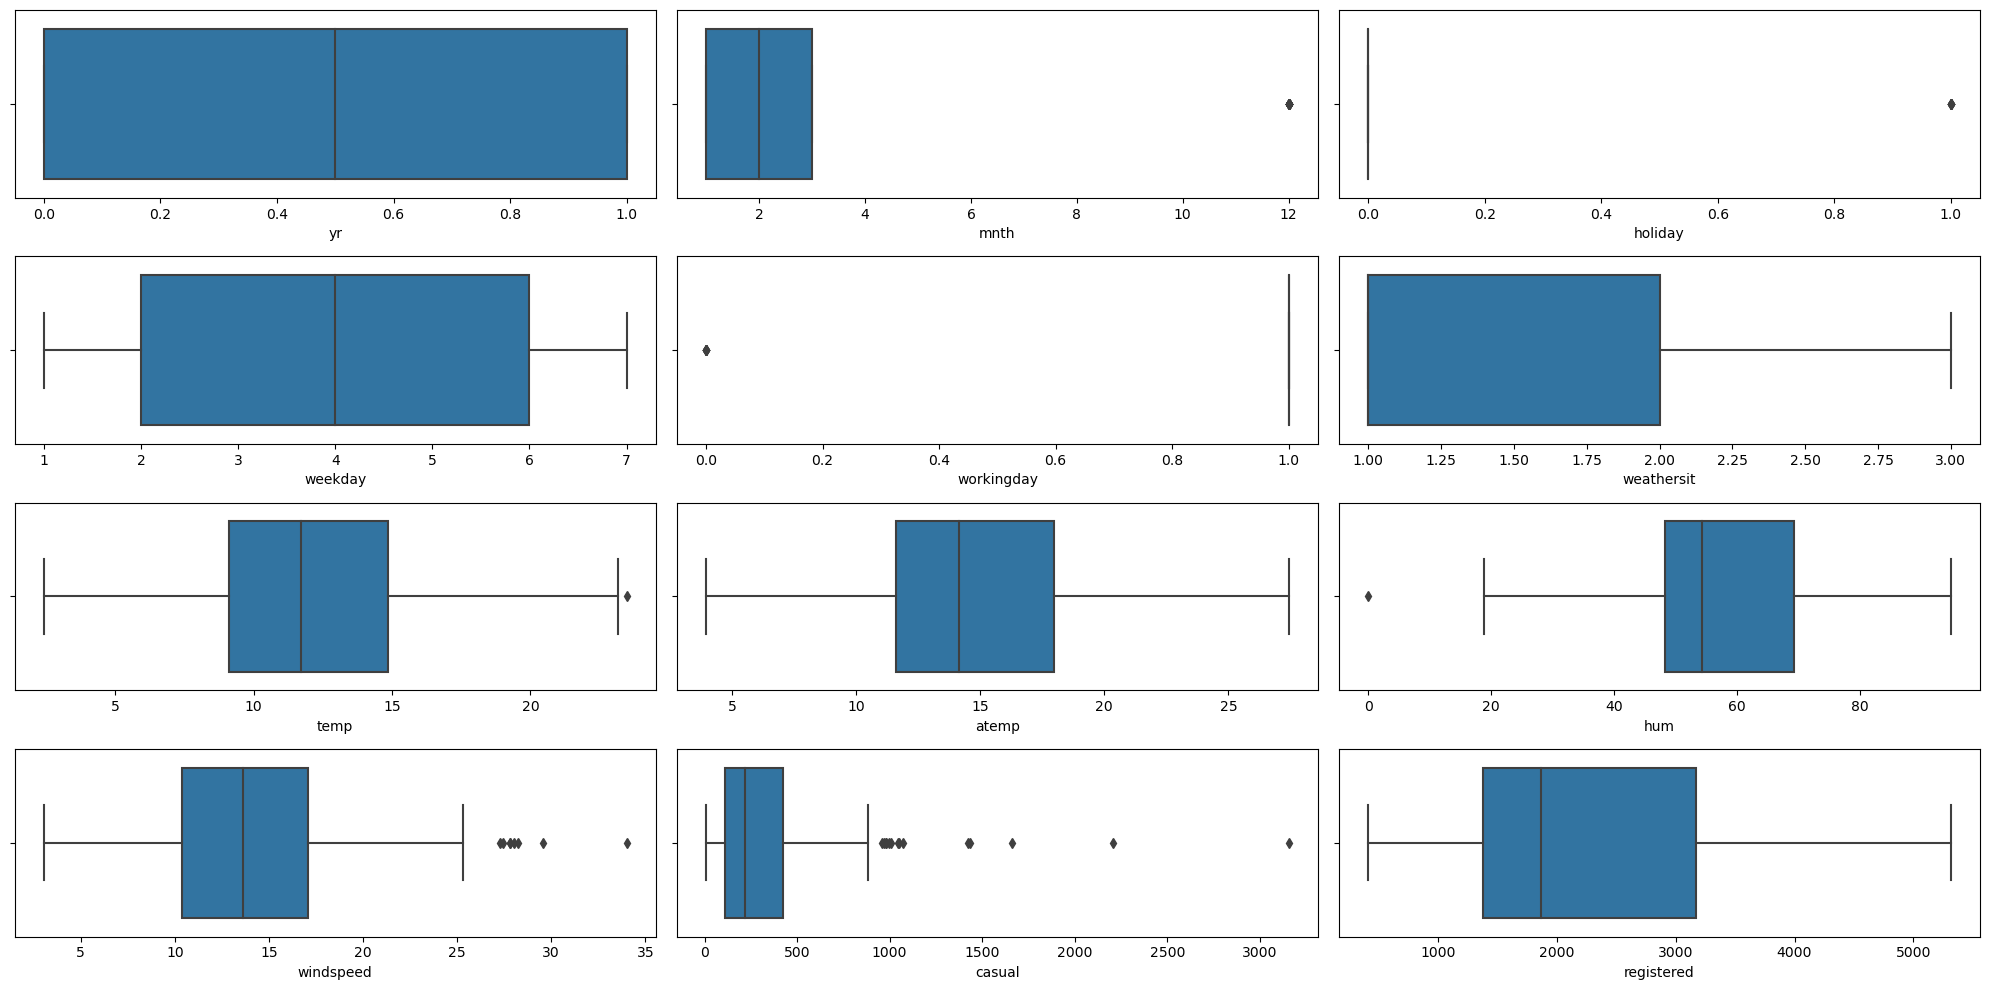

In [477]:
#BOXPLOT PARA LAS VARIABLES NUMÉRICAS


fig, axes= plt.subplots(4,3, figsize=(20,10))

axes=axes.flat

for i,column in enumerate(numericas.columns.drop(['instant'])):
    sns.boxplot(data=numericas, x=column, ax=axes[i])


plt.tight_layout()
plt.show();



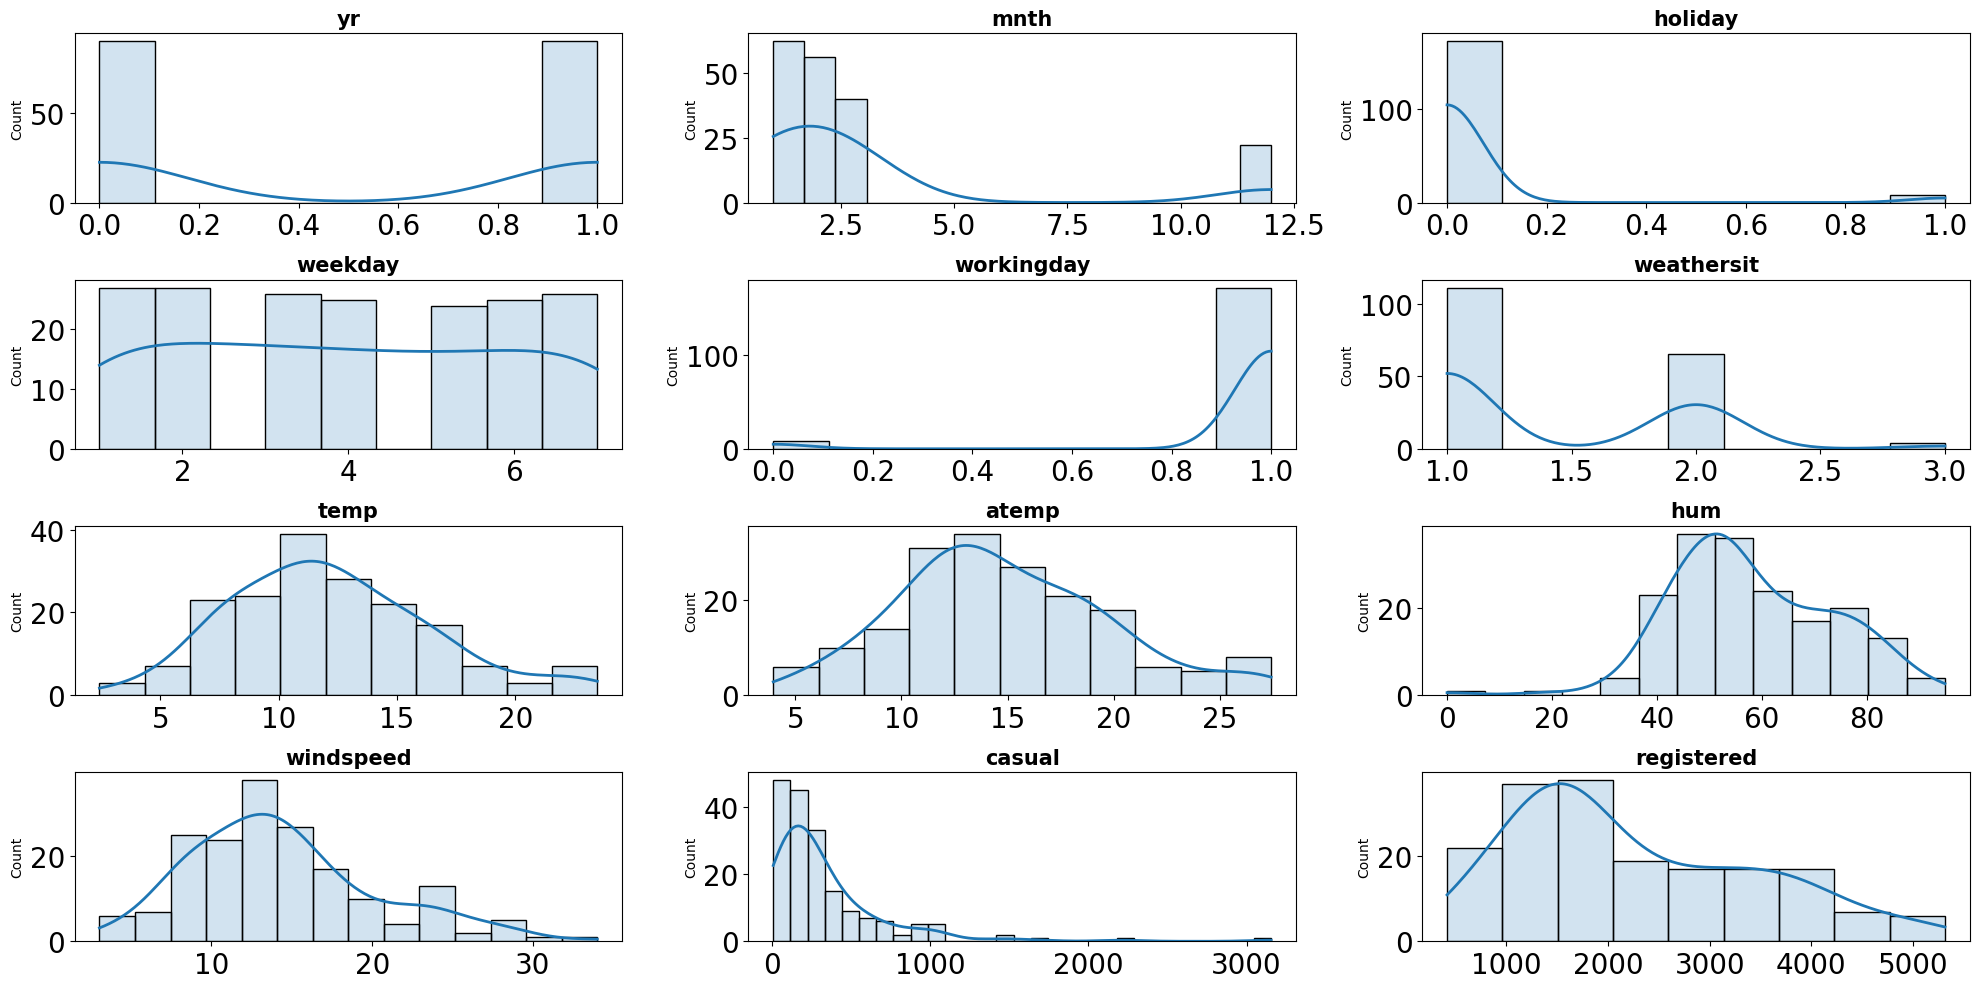

In [478]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 10))

axes = axes.flat

for i, colum in enumerate(numericas.columns.drop(['instant'])): 
    sns.histplot(
        data = numericas,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
 
plt.tight_layout()
plt.show();

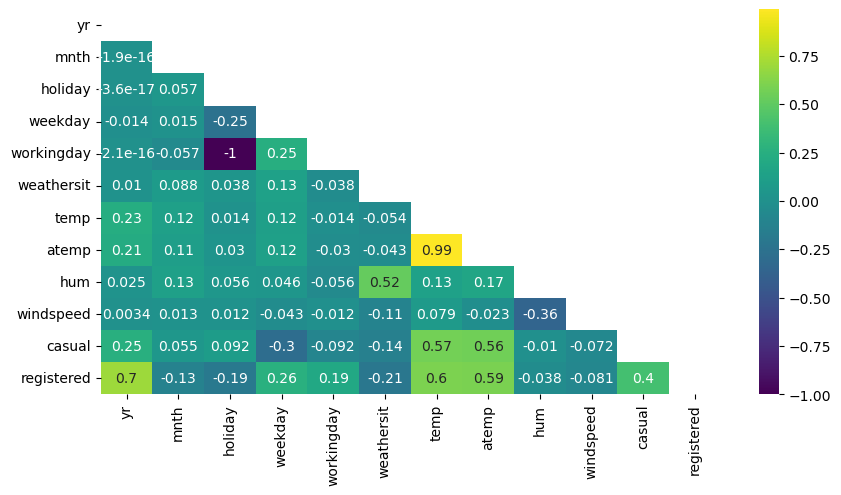

In [479]:


# Hacemos un heatmap con las variables numéricas contínuas
numeric = (df.select_dtypes(include = np.number)).drop(['instant'], axis=1)
correlacion = numeric.corr()
plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, cmap="viridis", annot = True, mask = mask); #barra lateral

In [480]:
#Hay una correlación muy fuerte y positiva entre temperatura y sensación térmica, el resto de variables,
#tienen una correlación débil.

In [481]:
df=df.reset_index()
df_resp=df_resp.reset_index()

In [482]:

df_merge=df.merge(df_resp, on='index')

In [483]:

df_merge=df_merge.drop('level_0',axis=1)

In [484]:

df_merge.to_csv('datos/bikes_eda.csv')

>## NORMALIZACIÓN DE LA VARIABLE RESPUESTA

In [485]:
df=pd.read_csv('datos/bikes_eda.csv')
df_resp=df['cnt'].reset_index()

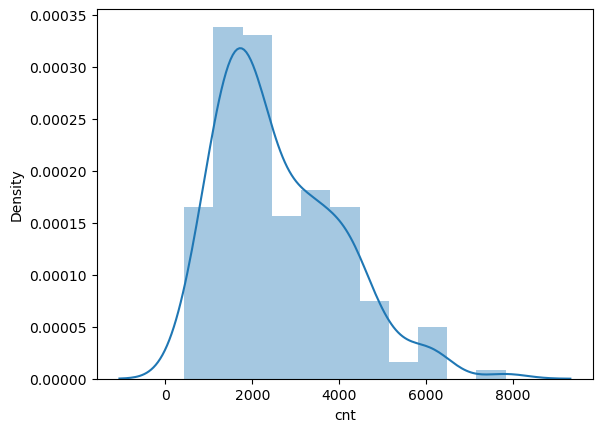

In [486]:
sns.distplot(df_resp["cnt"])
plt.show();

In [487]:
from scipy import stats

In [488]:
stats.shapiro(df_resp['cnt'])  #Mis datos no son normales


ShapiroResult(statistic=0.938895583152771, pvalue=6.223252739800955e-07)

In [489]:
#Normalizarlo

In [490]:
from scipy import stats

In [491]:
df['cnt_BOX'],lambda_ajustada=stats.boxcox(df_resp['cnt'])
df.head()

,Unnamed: 0,index,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_BOX
0,0,0,1,2018-01-01,winter,0,1,1,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,18.047507
1,1,1,2,2018-01-02,winter,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,16.952659
2,2,2,3,2018-01-03,winter,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,19.822839
3,3,3,4,2018-01-04,winter,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,20.698484
4,4,4,5,2018-01-05,winter,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,20.845083


In [492]:
stats.shapiro(df_resp['cnt'])  #Mis datos N0 son normales

ShapiroResult(statistic=0.938895583152771, pvalue=6.223252739800955e-07)

In [493]:
df=df.drop(['Unnamed: 0'],axis=1)

In [494]:
df.to_csv('datos/bikes_eda_norm.csv')

>## ESTANDARIZACIÓN DE LAS VARIABLES CATEGÓRICAS

In [514]:
df=pd.read_csv('datos/bikes_eda_norm.csv',index_col=0)
df_resp=df['cnt_BOX'].reset_index()
df=df.drop(['index','instant','cnt','cnt_BOX'], axis=1)
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,2018-01-01,winter,0,1,1,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654
1,2018-01-02,winter,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670
2,2018-01-03,winter,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229
3,2018-01-04,winter,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454
4,2018-01-05,winter,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2019-12-27,winter,1,12,0,6,1,2,10.420847,11.33210,65.2917,23.458911,247,1867
176,2019-12-28,winter,1,12,0,7,1,2,10.386653,12.75230,59.0000,10.416557,644,2451
177,2019-12-29,winter,1,12,0,1,1,2,10.386653,12.12000,75.2917,8.333661,159,1182
178,2019-12-30,winter,1,12,0,2,1,1,10.489153,11.58500,48.3333,23.500518,364,1432


In [515]:
df['dteday']=df['dteday'].astype('datetime64')

In [516]:
numericas=df.select_dtypes(include=np.number)

In [517]:
from sklearn.preprocessing import StandardScaler

In [518]:
scaler=StandardScaler()

In [519]:
scaler.fit(numericas)

StandardScaler()

In [520]:
X_estand=scaler.transform(numericas)

In [521]:
num_estand=pd.DataFrame(X_estand, columns=numericas.columns)
num_estand

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,-1.0,-0.617143,4.636809,-1.460318,-4.636809,1.112473,0.454618,0.677080,1.484801,-0.628344,-0.014021,-1.348671
1,-1.0,-0.617143,-0.215666,-0.965295,0.215666,1.112473,0.642695,0.577171,0.757869,0.391271,-0.530643,-1.335334
2,-1.0,-0.617143,-0.215666,-0.470272,0.215666,-0.758977,-0.984891,-1.083596,-0.956453,0.388609,-0.559057,-0.869379
3,-1.0,-0.617143,-0.215666,0.024751,0.215666,-0.758977,-0.949479,-0.854017,0.058056,-0.630080,-0.590054,-0.681830
4,-1.0,-0.617143,-0.215666,0.519774,0.215666,-0.758977,-0.686934,-0.680718,-0.958546,-0.322158,-0.657215,-0.628483
...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.0,2.615511,-0.215666,1.014798,0.215666,1.112473,-0.421926,-0.707277,0.471922,1.567151,-0.231002,-0.337574
176,1.0,2.615511,-0.215666,1.509821,0.215666,1.112473,-0.430049,-0.420225,0.055174,-0.685926,0.794493,0.149219
177,1.0,2.615511,-0.215666,-1.460318,0.215666,1.112473,-0.430049,-0.548026,1.134298,-1.045748,-0.458316,-0.908556
178,1.0,2.615511,-0.215666,-0.965295,0.215666,-0.758977,-0.405700,-0.656161,-0.651363,1.574339,0.071222,-0.700169


In [522]:
df=df.reset_index()
df_resp=df_resp.reset_index()
num_estand=num_estand.reset_index()

In [523]:
df_cat=df.select_dtypes(include=['object','category'])

In [524]:
df_cat

,season
0,winter
1,winter
2,winter
3,winter
4,winter
...,...
175,winter
176,winter
177,winter
178,winter


In [525]:
df_concat=pd.concat([df_cat,num_estand,df_resp], axis=1)

In [526]:
df_concat

,season,index,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,level_0,index,cnt_BOX
0,winter,0,-1.0,-0.617143,4.636809,-1.460318,-4.636809,1.112473,0.454618,0.677080,1.484801,-0.628344,-0.014021,-1.348671,0,0,18.047507
1,winter,1,-1.0,-0.617143,-0.215666,-0.965295,0.215666,1.112473,0.642695,0.577171,0.757869,0.391271,-0.530643,-1.335334,1,1,16.952659
2,winter,2,-1.0,-0.617143,-0.215666,-0.470272,0.215666,-0.758977,-0.984891,-1.083596,-0.956453,0.388609,-0.559057,-0.869379,2,2,19.822839
3,winter,3,-1.0,-0.617143,-0.215666,0.024751,0.215666,-0.758977,-0.949479,-0.854017,0.058056,-0.630080,-0.590054,-0.681830,3,3,20.698484
4,winter,4,-1.0,-0.617143,-0.215666,0.519774,0.215666,-0.758977,-0.686934,-0.680718,-0.958546,-0.322158,-0.657215,-0.628483,4,4,20.845083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,winter,175,1.0,2.615511,-0.215666,1.014798,0.215666,1.112473,-0.421926,-0.707277,0.471922,1.567151,-0.231002,-0.337574,175,175,22.608759
176,winter,176,1.0,2.615511,-0.215666,1.509821,0.215666,1.112473,-0.430049,-0.420225,0.055174,-0.685926,0.794493,0.149219,176,176,25.226188
177,winter,177,1.0,2.615511,-0.215666,-1.460318,0.215666,1.112473,-0.430049,-0.548026,1.134298,-1.045748,-0.458316,-0.908556,177,177,19.787973
178,winter,178,1.0,2.615511,-0.215666,-0.965295,0.215666,-0.758977,-0.405700,-0.656161,-0.651363,1.574339,0.071222,-0.700169,178,178,21.562073


In [527]:
df_concat=df_concat.drop(['level_0','index'],axis=1)

In [528]:
df_concat

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_BOX
0,winter,-1.0,-0.617143,4.636809,-1.460318,-4.636809,1.112473,0.454618,0.677080,1.484801,-0.628344,-0.014021,-1.348671,18.047507
1,winter,-1.0,-0.617143,-0.215666,-0.965295,0.215666,1.112473,0.642695,0.577171,0.757869,0.391271,-0.530643,-1.335334,16.952659
2,winter,-1.0,-0.617143,-0.215666,-0.470272,0.215666,-0.758977,-0.984891,-1.083596,-0.956453,0.388609,-0.559057,-0.869379,19.822839
3,winter,-1.0,-0.617143,-0.215666,0.024751,0.215666,-0.758977,-0.949479,-0.854017,0.058056,-0.630080,-0.590054,-0.681830,20.698484
4,winter,-1.0,-0.617143,-0.215666,0.519774,0.215666,-0.758977,-0.686934,-0.680718,-0.958546,-0.322158,-0.657215,-0.628483,20.845083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,winter,1.0,2.615511,-0.215666,1.014798,0.215666,1.112473,-0.421926,-0.707277,0.471922,1.567151,-0.231002,-0.337574,22.608759
176,winter,1.0,2.615511,-0.215666,1.509821,0.215666,1.112473,-0.430049,-0.420225,0.055174,-0.685926,0.794493,0.149219,25.226188
177,winter,1.0,2.615511,-0.215666,-1.460318,0.215666,1.112473,-0.430049,-0.548026,1.134298,-1.045748,-0.458316,-0.908556,19.787973
178,winter,1.0,2.615511,-0.215666,-0.965295,0.215666,-0.758977,-0.405700,-0.656161,-0.651363,1.574339,0.071222,-0.700169,21.562073


In [529]:
df_concat.to_csv('datos/bikes_norm_estand.csv')

>## ASUNCIONES

In [538]:
df=pd.read_csv('datos/bikes_norm_estand.csv')
df_resp=df['cnt_BOX'].reset_index()
df=df.drop(['cnt_BOX','Unnamed: 0'],axis=1)
numericas=df.select_dtypes(include=np.number)

In [539]:
numericas.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,-1.0,-0.617143,4.636809,-1.460318,-4.636809,1.112473,0.454618,0.677080,1.484801,-0.628344,-0.014021,-1.348671
1,-1.0,-0.617143,-0.215666,-0.965295,0.215666,1.112473,0.642695,0.577171,0.757869,0.391271,-0.530643,-1.335334
2,-1.0,-0.617143,-0.215666,-0.470272,0.215666,-0.758977,-0.984891,-1.083596,-0.956453,0.388609,-0.559057,-0.869379
3,-1.0,-0.617143,-0.215666,0.024751,0.215666,-0.758977,-0.949479,-0.854017,0.058056,-0.630080,-0.590054,-0.681830
4,-1.0,-0.617143,-0.215666,0.519774,0.215666,-0.758977,-0.686934,-0.680718,-0.958546,-0.322158,-0.657215,-0.628483


>Normalidad


In [540]:
for col in numericas:
    print(f'Para la columna {col} el resultado del test de Shapiro es: {stats.shapiro(numericas[col])}')

Para la columna yr el resultado del test de Shapiro es: ShapiroResult(statistic=0.6364224553108215, pvalue=2.1336584940937482e-19)
Para la columna mnth el resultado del test de Shapiro es: ShapiroResult(statistic=0.5658035278320312, pvalue=5.0002506612301495e-21)
Para la columna holiday el resultado del test de Shapiro es: ShapiroResult(statistic=0.2077304720878601, pvalue=4.451933822312858e-27)
Para la columna weekday el resultado del test de Shapiro es: ShapiroResult(statistic=0.9142937064170837, pvalue=9.399411027288807e-09)
Para la columna workingday el resultado del test de Shapiro es: ShapiroResult(statistic=0.20772933959960938, pvalue=4.451796310914829e-27)
Para la columna weathersit el resultado del test de Shapiro es: ShapiroResult(statistic=0.6622633934020996, pvalue=9.668869719174416e-19)
Para la columna temp el resultado del test de Shapiro es: ShapiroResult(statistic=0.9789473414421082, pvalue=0.007980366237461567)
Para la columna atemp el resultado del test de Shapiro es:

>Independencia

In [541]:
import researchpy as rp

In [542]:
for col in numericas:
    crosstab,test_results, expected2= rp.crosstab(df_resp['cnt_BOX'],numericas[col],
                                test= "chi-square",
                                expected_freqs= True,
                                prop= "cell")
    print(f'Para la relación de la variable respuesta con la columna {col}, el resultado es {test_results}')

Para la relación de la variable respuesta con la columna yr, el resultado es                   Chi-square test   results
0  Pearson Chi-square ( 177.0) =   178.0000
1                      p-value =     0.4647
2                   Cramer's V =     0.9944
Para la relación de la variable respuesta con la columna mnth, el resultado es                   Chi-square test   results
0  Pearson Chi-square ( 531.0) =   530.7559
1                      p-value =     0.4948
2                   Cramer's V =     0.9914
Para la relación de la variable respuesta con la columna holiday, el resultado es                   Chi-square test   results
0  Pearson Chi-square ( 177.0) =   180.0000
1                      p-value =     0.4231
2                   Cramer's V =     1.0000
Para la relación de la variable respuesta con la columna weekday, el resultado es                    Chi-square test    results
0  Pearson Chi-square ( 1062.0) =   1065.8551
1                       p-value =      0.4610
2             

In [ ]:
#Los datos de las variables independientes no son independientes con respecto a la variable respuesta.

>Homocedasticidad

In [546]:
df=pd.read_csv('datos/bikes_norm_estand.csv')
df_resp=df['cnt_BOX'].reset_index()
df=df.drop(['Unnamed: 0'],axis=1)
numericas=df.select_dtypes(include=np.number)

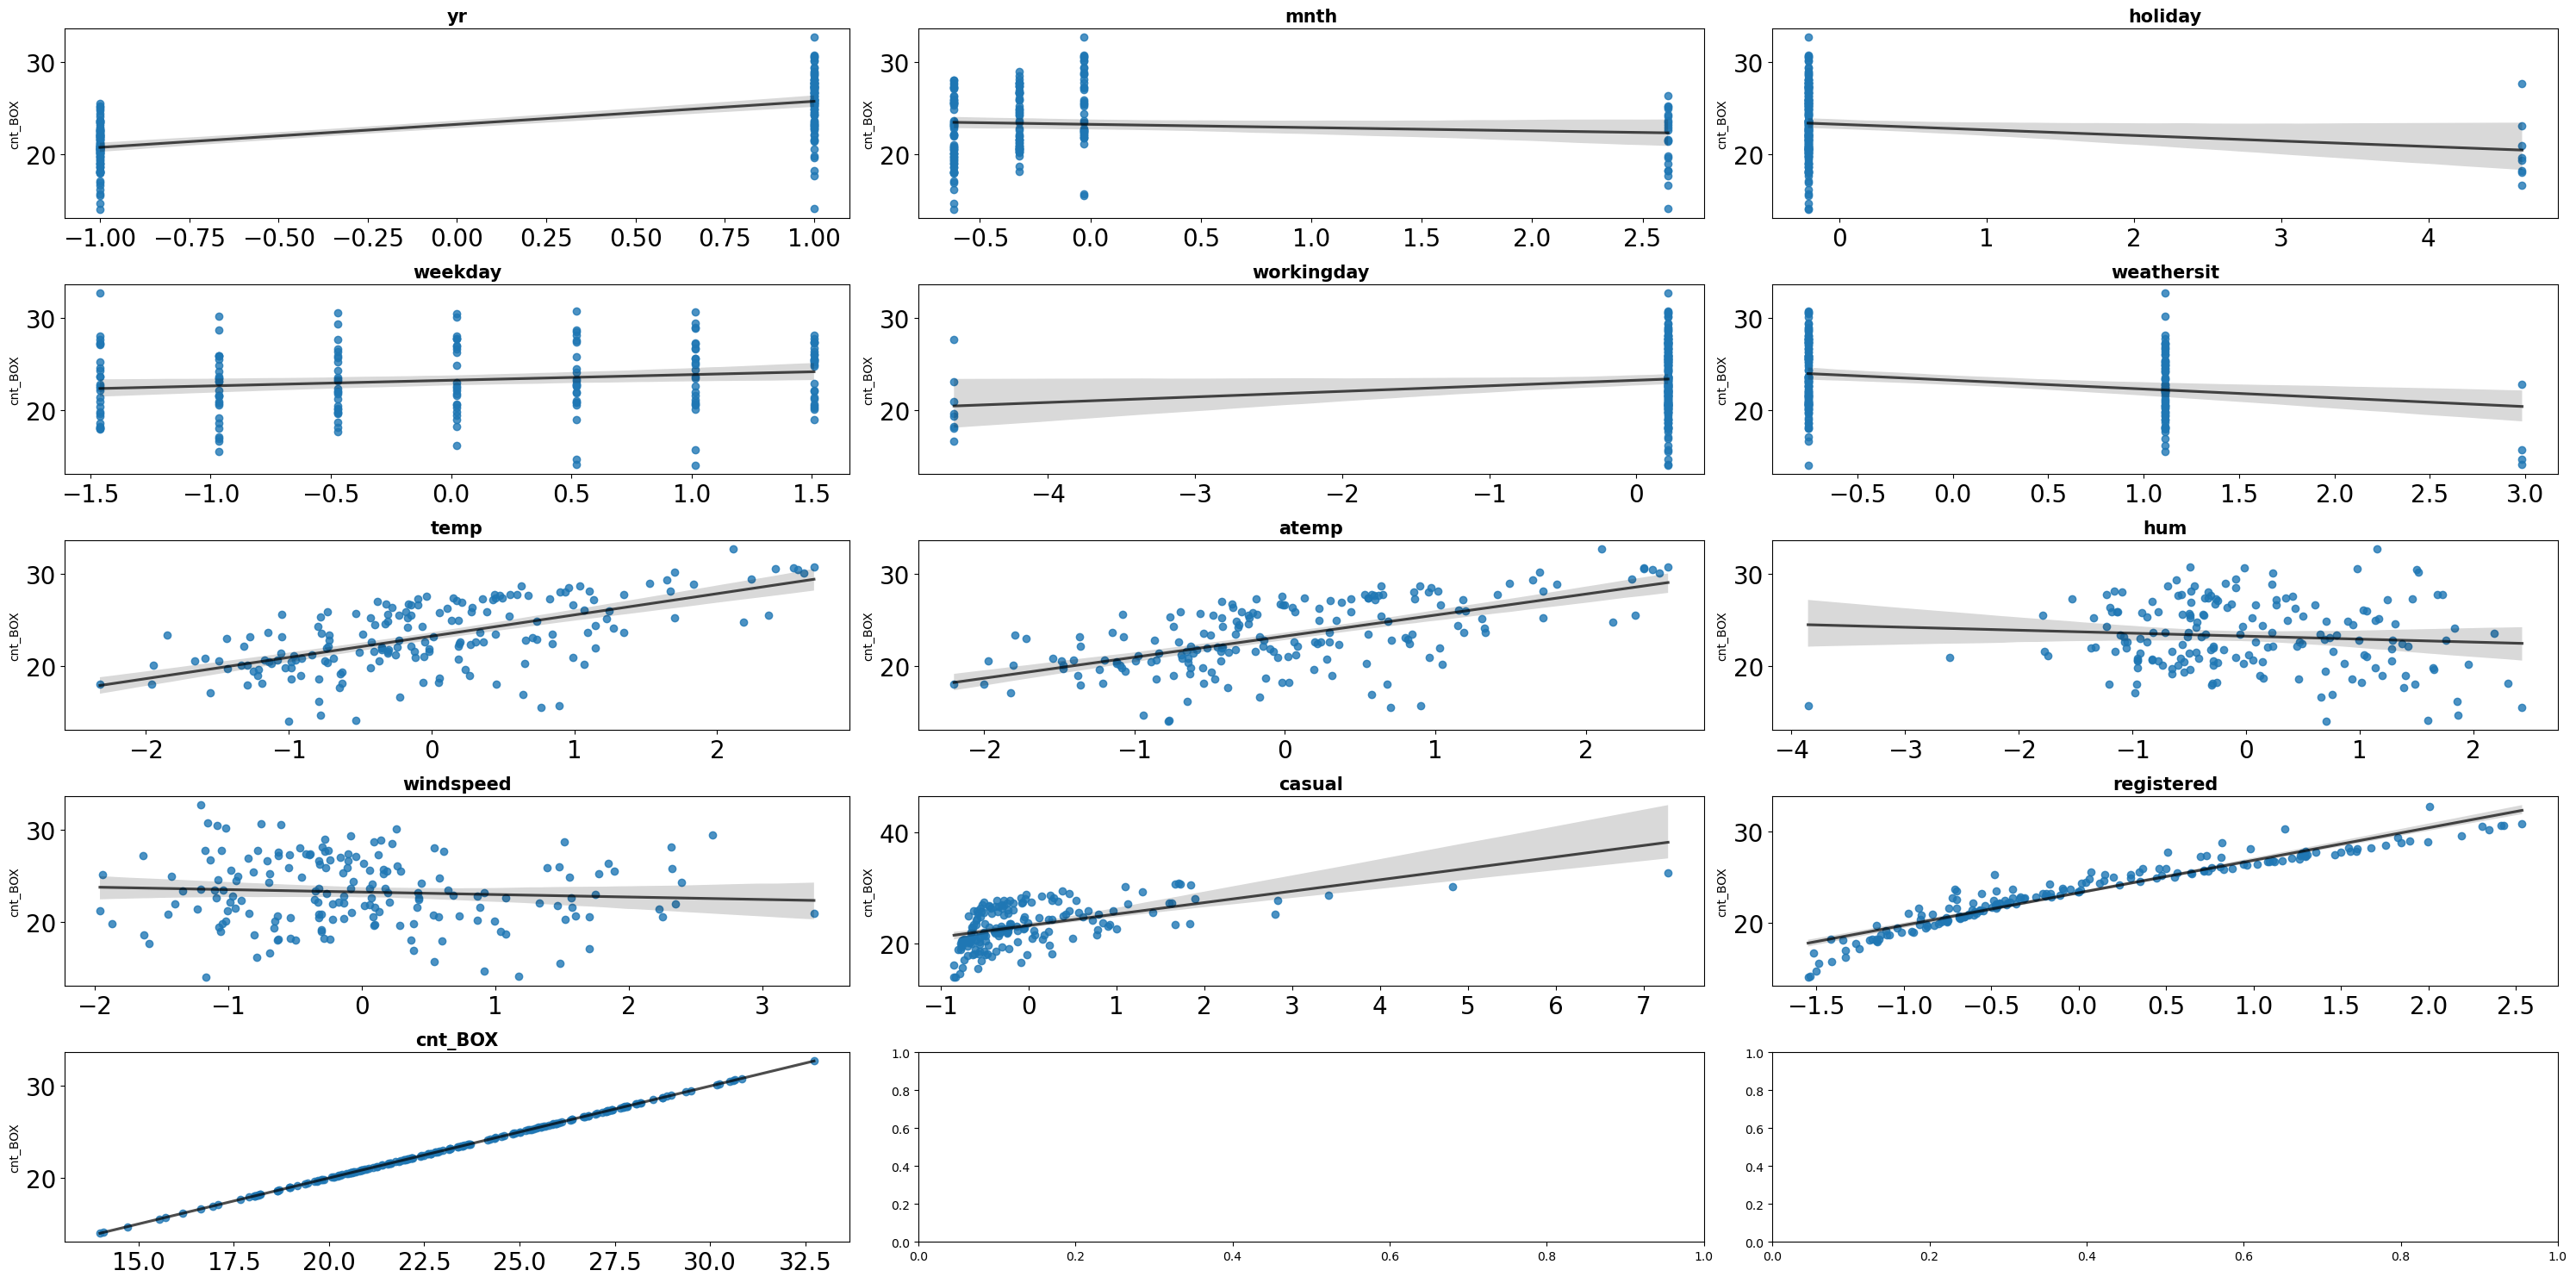

In [550]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (30, 15))

# definimos una lista de colores. Cada color corresponderá a una gráfica
lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(numericas.columns): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'cnt_BOX',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

In [ ]:
# Tenemos algunas variables homocedásticas, pero no todas. Las variables casual y registered don las menos homocedásticas.

In [ ]:
#Test de Levene para las variables independientes dicotómicas.

In [551]:
num_categ=df.select_dtypes(include=['number','category']).drop(['cnt_BOX'],axis=1).columns

In [552]:
from scipy.stats import levene

In [554]:
# creamos un diccionario para almacenar los resultados de los test
resultados = {}

#iteremos por la lista de las columnas numéricas
for col in num_categ:
    # calculamos el p-valor de test
    statistic, p_val = levene(df[col], df.cnt_BOX, center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val

In [555]:
resultados # Para las variables numéricas. Todas estas variables son homocedásticas con respecto a la variable respuesta

{'yr': 2.589761952093641e-32,
 'mnth': 5.8557226738677014e-39,
 'holiday': 3.727758508697998e-45,
 'weekday': 3.184426119129226e-34,
 'workingday': 3.727758508697998e-45,
 'weathersit': 8.24398279644277e-33,
 'temp': 2.9633738896572697e-35,
 'atemp': 4.132592322247505e-35,
 'hum': 8.685735231986107e-35,
 'windspeed': 1.5193653295039788e-35,
 'casual': 3.284133706428512e-38,
 'registered': 2.834739626710541e-34}

>## ENCODING

In [557]:
df=pd.read_csv('datos/bikes_norm_estand.csv')
df_resp=df['cnt_BOX'].reset_index()
df=df.drop(['Unnamed: 0'],axis=1)
numericas=df.select_dtypes(include=np.number)

In [558]:
#Mapear season
df['season'] = df['season'].map({'winter':1})

In [559]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_BOX
0,1,-1.0,-0.617143,4.636809,-1.460318,-4.636809,1.112473,0.454618,0.677080,1.484801,-0.628344,-0.014021,-1.348671,18.047507
1,1,-1.0,-0.617143,-0.215666,-0.965295,0.215666,1.112473,0.642695,0.577171,0.757869,0.391271,-0.530643,-1.335334,16.952659
2,1,-1.0,-0.617143,-0.215666,-0.470272,0.215666,-0.758977,-0.984891,-1.083596,-0.956453,0.388609,-0.559057,-0.869379,19.822839
3,1,-1.0,-0.617143,-0.215666,0.024751,0.215666,-0.758977,-0.949479,-0.854017,0.058056,-0.630080,-0.590054,-0.681830,20.698484
4,1,-1.0,-0.617143,-0.215666,0.519774,0.215666,-0.758977,-0.686934,-0.680718,-0.958546,-0.322158,-0.657215,-0.628483,20.845083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,1.0,2.615511,-0.215666,1.014798,0.215666,1.112473,-0.421926,-0.707277,0.471922,1.567151,-0.231002,-0.337574,22.608759
176,1,1.0,2.615511,-0.215666,1.509821,0.215666,1.112473,-0.430049,-0.420225,0.055174,-0.685926,0.794493,0.149219,25.226188
177,1,1.0,2.615511,-0.215666,-1.460318,0.215666,1.112473,-0.430049,-0.548026,1.134298,-1.045748,-0.458316,-0.908556,19.787973
178,1,1.0,2.615511,-0.215666,-0.965295,0.215666,-0.758977,-0.405700,-0.656161,-0.651363,1.574339,0.071222,-0.700169,21.562073


In [560]:
col_nuevas={'yr':'year','mnth':'month','cnt':'bike_count'}

In [561]:
df=df.rename(columns=col_nuevas)

In [562]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_BOX
0,1,-1.0,-0.617143,4.636809,-1.460318,-4.636809,1.112473,0.454618,0.677080,1.484801,-0.628344,-0.014021,-1.348671,18.047507
1,1,-1.0,-0.617143,-0.215666,-0.965295,0.215666,1.112473,0.642695,0.577171,0.757869,0.391271,-0.530643,-1.335334,16.952659
2,1,-1.0,-0.617143,-0.215666,-0.470272,0.215666,-0.758977,-0.984891,-1.083596,-0.956453,0.388609,-0.559057,-0.869379,19.822839
3,1,-1.0,-0.617143,-0.215666,0.024751,0.215666,-0.758977,-0.949479,-0.854017,0.058056,-0.630080,-0.590054,-0.681830,20.698484
4,1,-1.0,-0.617143,-0.215666,0.519774,0.215666,-0.758977,-0.686934,-0.680718,-0.958546,-0.322158,-0.657215,-0.628483,20.845083


In [563]:
df.to_csv('datos/bikes_preparado.csv')